## BOSCH Data from Markus

In [42]:
import numpy as np
from stareg.star_model import  StarModel
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
DATAPATH = "..\\..\\Data\\"

In [30]:
df = pd.read_csv(DATAPATH+"\\Bosch_Markus_0904.csv")

id         iq      Psid      Psiq
0     26.697754   1.185721  0.006367  0.000108
1     56.437309  10.197527  0.007582  0.000807
2     20.595451 -54.549751  0.005741 -0.004480
3    -50.400128 -66.994393  0.001717 -0.005905
4    -13.438749 -65.007627  0.003882 -0.005566
...         ...        ...       ...       ...
9995 -17.150098  39.473266  0.003762  0.003543
9996  48.041610 -53.308279  0.006858 -0.003987
9997  24.784565 -46.862344  0.006030 -0.003893
9998  35.370848  22.014705  0.006726  0.001869
9999  30.484250   2.629709  0.006558  0.000233

[10000 rows x 4 columns]

In [ ]:
Each item in 'specs' is a dictionary.
        The available keys are:
        * type (string, default 'xy'): Subplot type. One of
            - 'xy': 2D Cartesian subplot type for scatter, bar, etc.
            - 'scene': 3D Cartesian subplot for scatter3d, cone, etc.
            - 'polar': Polar subplot for scatterpolar, barpolar, etc.
            - 'ternary': Ternary subplot for scatterternary
            - 'mapbox': Mapbox subplot for scattermapbox
            - 'domain': Subplot type for traces that are individually
                        positioned. pie, parcoords, parcats, etc.
            - trace type: A trace type which will be used to determine
                          the appropriate subplot type for that trace

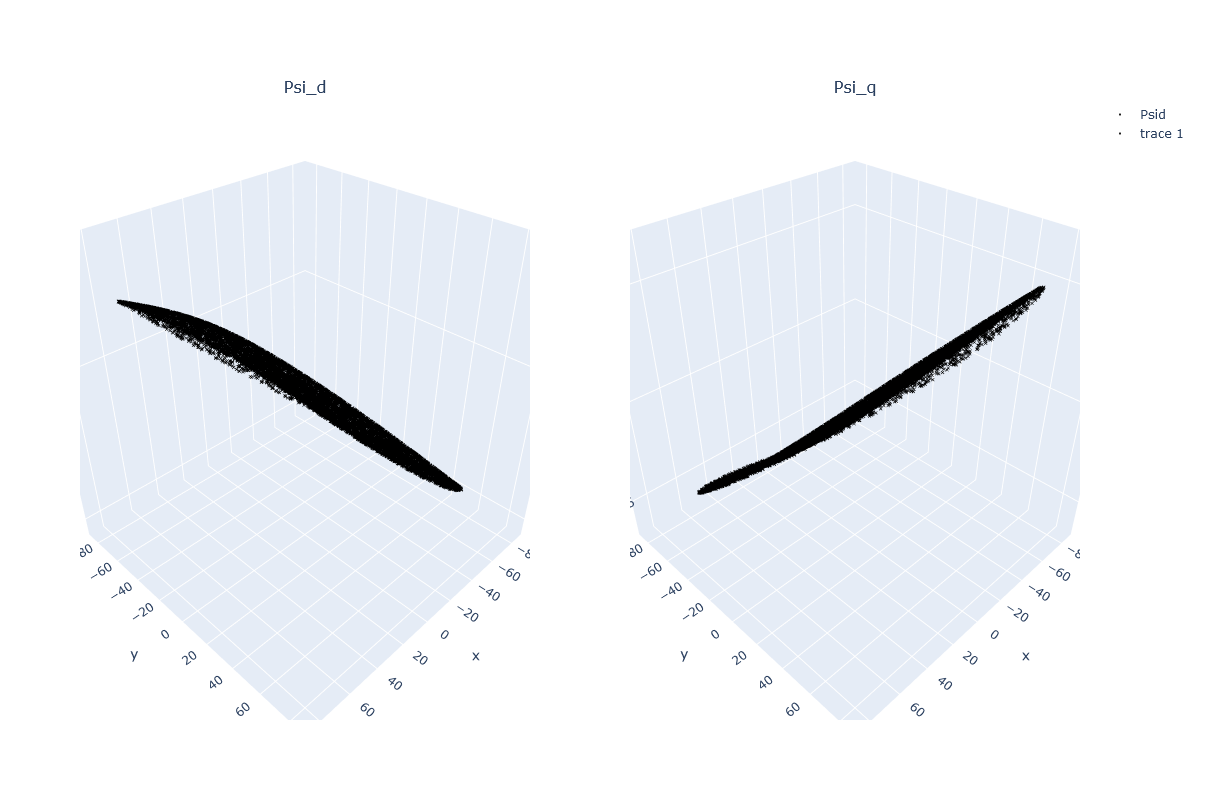

In [83]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "scene", }, {"type": "surface"}]],
                   subplot_titles=["Psi_d", "Psi_q"], row_heights=[700], shared_xaxes=True)

fig.add_trace(go.Scatter3d(x=df["id"], y=df["iq"], z=df["Psid"],name="Psid", mode="markers", marker=dict(size=1, symbol="x", color="black")), row=1, col=1)
fig.add_trace(go.Scatter3d(x=df["id"], y=df["iq"], z=df["Psiq"], mode="markers", marker=dict(size=1, symbol="x", color="black")), row=1, col=2)
fig.update_layout(height=800)

### Fit $\Psi_d$

In [100]:
m = ( #("s(1)", "inc", 10, (0.1, 1000), "equidistant"), 
      #("s(2)", "inc", 10, (0.1, 1000), "equidistant"), 
      ("t(1,2)", "none", (6,6), (0.1, 1000), "equidistant"), )

M = StarModel(description=m)
M.fit(X=df[["id", "iq"]].values, y=df["Psid"].values, plot_=0, verbose=True)

fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df["id"], y=df["iq"], z=df["Psid"],name="Psid", mode="markers", marker=dict(size=1, symbol="x", color="black")))
fig.add_trace(go.Scatter3d(x=df["id"], y=df["iq"], z=M.basis @ M.coef_,name="Fit", mode="markers", marker=dict(size=1, symbol="x", color="red")))
fig.update_layout(height=900)

In [96]:
from sklearn.metrics import mean_squared_error

In [101]:
mean_squared_error(M.basis@M.coef_, df["Psid"])

6.621022557876936e-11

Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
----Iteration 1-----
-----v_old = 0------
-----v_new = 0------ 

--PIRLS converged!--
MSE =  6.621022557876936e-11


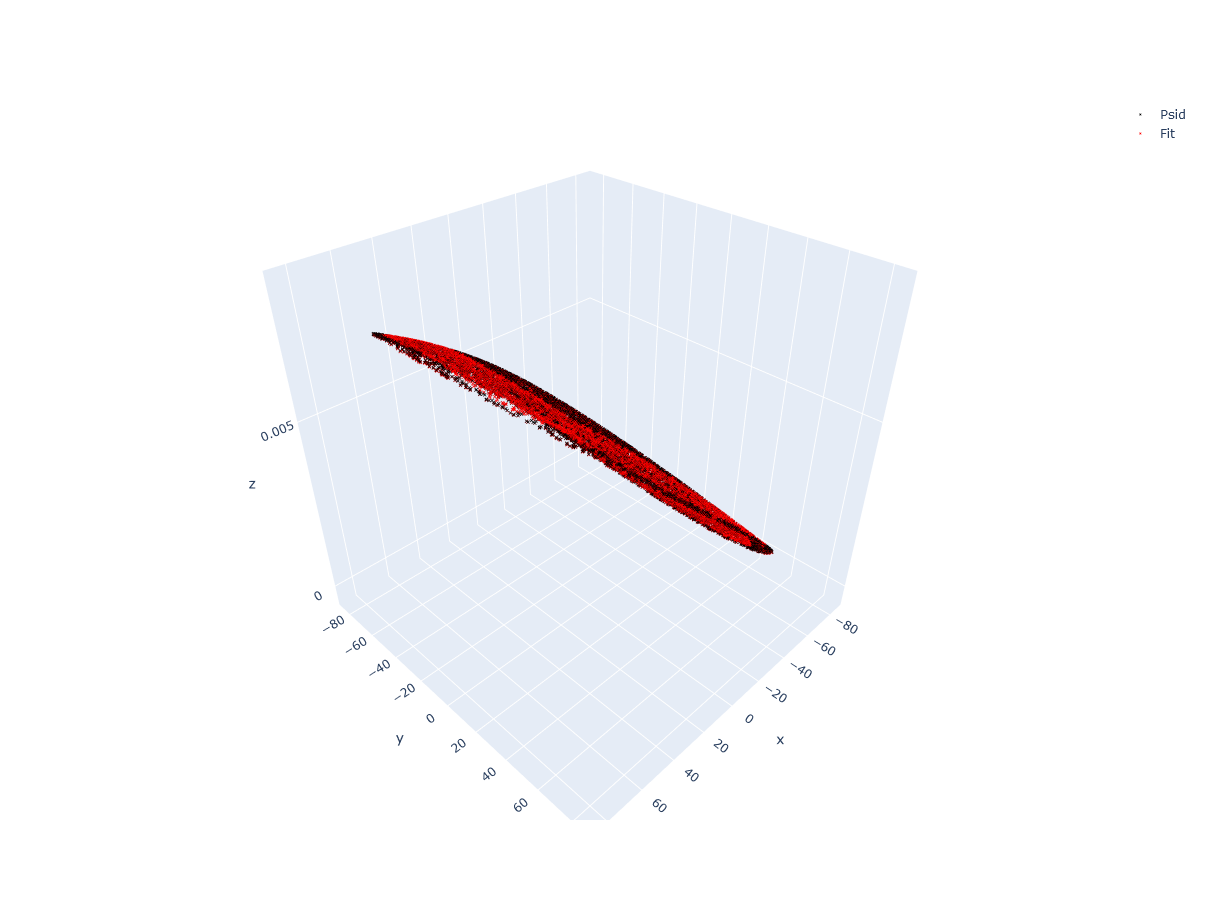

In [105]:
md = ( #("s(1)", "inc", 10, (0.1, 1000), "equidistant"), 
      #("s(2)", "inc", 10, (0.1, 1000), "equidistant"), 
      ("t(1,2)", "none", (6,6), (0.1, 1000), "equidistant"), )

Md = StarModel(description=md)
Md.fit(X=df[["id", "iq"]].values, y=df["Psid"].values, plot_=0, verbose=True)
print("MSE = ", mean_squared_error(Md.basis @ Md.coef_, df["Psid"]))
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df["id"], y=df["iq"], z=df["Psid"],name="Psid", mode="markers", marker=dict(size=1, symbol="x", color="black")))
fig.add_trace(go.Scatter3d(x=df["id"], y=df["iq"], z=Md.basis @ Md.coef_,name="Fit", mode="markers", marker=dict(size=1, symbol="x", color="red")))
fig.update_layout(height=900)

### Fit $\Psi_q$

In [106]:
mq = ( #("s(1)", "inc", 10, (0.1, 1000), "equidistant"), 
      #("s(2)", "inc", 10, (0.1, 1000), "equidistant"), 
      ("t(1,2)", "none", (6,6), (0.1, 1000), "equidistant"), )

Mq = StarModel(description=mq)
Mq.fit(X=df[["id", "iq"]].values, y=df["Psiq"].values, plot_=0, verbose=True)
print("MSE = ", mean_squared_error(Mq.basis @ Mq.coef_, df["Psiq"]))
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df["id"], y=df["iq"], z=df["Psiq"],name="Psiq", mode="markers", marker=dict(size=1, symbol="x", color="black")))
fig.add_trace(go.Scatter3d(x=df["id"], y=df["iq"], z=Mq.basis @ Mq.coef_,name="Fit", mode="markers", marker=dict(size=1, symbol="x", color="red")))
fig.update_layout(height=900)

Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
----Iteration 1-----
-----v_old = 0------
-----v_new = 0------ 

--PIRLS converged!--
MSE =  4.764446648305425e-11
